In [2]:
from keras.utils.np_utils import to_categorical
from keras import regularizers
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Activation

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
from keras.datasets import cifar10

In [5]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

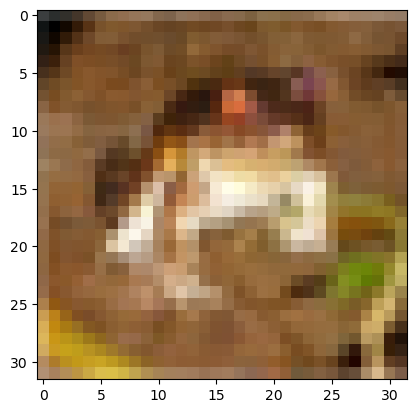

In [7]:
plt.imshow(X_train[0])

In [11]:
train_images = X_train.astype(np.float32) / 255
test_images = X_test.astype(np.float32) / 255

In [19]:
num_classes = np.unique(y_train).__len__()
train_labels = to_categorical(y_train, num_classes)
test_labels = to_categorical(y_test, num_classes)

In [31]:
shape_img = train_images.shape[1:]
base_filtros = 32
w_regularize = 1e-4

In [35]:
model = Sequential()

model.add( Conv2D(filters=base_filtros,
                  padding='same',
                  kernel_size=(3,3),
                  kernel_regularizer=regularizers.l2(l=w_regularize),
                  input_shape=shape_img) )
model.add(Activation('relu'))

model.add( Conv2D(filters=base_filtros,
                  padding='same',
                  kernel_size=(3,3),
                  kernel_regularizer=regularizers.l2(l=w_regularize)) )
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
# Capa 3
model.add( Conv2D(filters=2*base_filtros,
                  padding='same',
                  kernel_size=(3,3),
                  kernel_regularizer=regularizers.l2(l=w_regularize) ) )
model.add(Activation('relu'))
model.add(Dropout(0.2))
# Capa 4
model.add( Conv2D(filters=2*base_filtros,
                  padding='same',
                  kernel_size=(3,3),
                  kernel_regularizer=regularizers.l2(l=w_regularize) ) )
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))
# Capa 5
model.add( Conv2D(filters=4*base_filtros,
                  padding='same',
                  kernel_size=(3,3),
                  kernel_regularizer=regularizers.l2(l=w_regularize) ) )
model.add(Activation('relu'))
# Capa 6
model.add( Conv2D(filters=4*base_filtros,
                  padding='same',
                  kernel_size=(3,3),
                  kernel_regularizer=regularizers.l2(l=w_regularize) ) )
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))
# Clasificación
model.add(Flatten())
model.add(Dense(num_classes, activation='softmax'))
model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_3 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
activation_4 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 16, 16, 64)        18496     
__________

In [37]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [43]:
history = model.fit(train_images, train_labels,
                    epochs=25,
                    batch_size=64,
                    validation_split=0.1,
                    verbose=2,
                    shuffle=True)

Train on 45000 samples, validate on 5000 samples
Epoch 1/25
 - 46s - loss: 0.7472 - acc: 0.7690 - val_loss: 0.7190 - val_acc: 0.7912
Epoch 2/25
 - 30s - loss: 0.7372 - acc: 0.7733 - val_loss: 0.6976 - val_acc: 0.7916
Epoch 3/25
 - 30s - loss: 0.7293 - acc: 0.7748 - val_loss: 0.6917 - val_acc: 0.7966
Epoch 4/25
 - 30s - loss: 0.7220 - acc: 0.7780 - val_loss: 0.7066 - val_acc: 0.7922
Epoch 5/25
 - 30s - loss: 0.7113 - acc: 0.7815 - val_loss: 0.6926 - val_acc: 0.8010
Epoch 6/25
 - 30s - loss: 0.7117 - acc: 0.7807 - val_loss: 0.6825 - val_acc: 0.7980
Epoch 7/25
 - 30s - loss: 0.7014 - acc: 0.7858 - val_loss: 0.6630 - val_acc: 0.8070
Epoch 8/25
 - 30s - loss: 0.6985 - acc: 0.7885 - val_loss: 0.6857 - val_acc: 0.7990
Epoch 9/25
 - 30s - loss: 0.6841 - acc: 0.7935 - val_loss: 0.6569 - val_acc: 0.8148
Epoch 10/25
 - 30s - loss: 0.6875 - acc: 0.7923 - val_loss: 0.6726 - val_acc: 0.8090
Epoch 11/25
 - 29s - loss: 0.6759 - acc: 0.7958 - val_loss: 0.6724 - val_acc: 0.8094
Epoch 12/25
 - 29s - loss

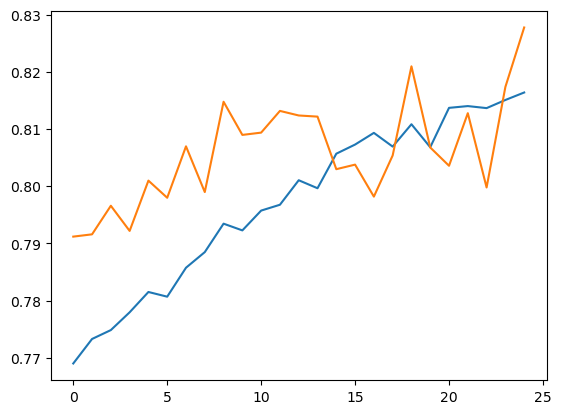

In [49]:
plt.plot(history.history['acc'], label='train')
plt.plot(history.history['val_acc'], label='val')

In [51]:
model.evaluate(test_images, test_labels)

10000/10000 [==============================] - 19s 2ms/step


[0.6492817508697509, 0.8142]